**CSE422 - LAB Project**

**Section - 11**

**Group -4**

---

**Group members-**

*`Rejwan Shafi	23241108`*

*`Homairah Ferdousia	21301162`*

*`Tasmia Tabassum	21301495`*

*`Istiak Islam 	21301236`*

In [1]:
import missingno as msno
import matplotlib
import matplotlib.pyplot as plt

import pandas as pd
import seaborn as sns
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt

from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,VotingClassifier

from sklearn.metrics import *
from sklearn.model_selection import *
import numpy as np


from imblearn.over_sampling import SMOTE

In [2]:
df = pd.read_csv('/content/dataset.csv')
print(df.shape)
df.head(10)

(43400, 12)


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0
5,32257,Female,47.0,0,0,Yes,Private,Urban,210.95,50.1,NaN,0
6,52800,Female,52.0,0,0,Yes,Private,Urban,77.59,17.7,formerly smoked,0
7,41413,Female,75.0,0,1,Yes,Self-employed,Rural,243.53,27.0,never smoked,0
8,15266,Female,32.0,0,0,Yes,Private,Rural,77.67,32.3,smokes,0
9,28674,Female,74.0,1,0,Yes,Self-employed,Urban,205.84,54.6,never smoked,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43400 entries, 0 to 43399
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 43400 non-null  int64  
 1   gender             43400 non-null  object 
 2   age                43400 non-null  float64
 3   hypertension       43400 non-null  int64  
 4   heart_disease      43400 non-null  int64  
 5   ever_married       43400 non-null  object 
 6   work_type          43400 non-null  object 
 7   Residence_type     43400 non-null  object 
 8   avg_glucose_level  43400 non-null  float64
 9   bmi                41938 non-null  float64
 10  smoking_status     30108 non-null  object 
 11  stroke             43400 non-null  int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 4.0+ MB


In [4]:
df.count()

id                   43400
gender               43400
age                  43400
hypertension         43400
heart_disease        43400
ever_married         43400
work_type            43400
Residence_type       43400
avg_glucose_level    43400
bmi                  41938
smoking_status       30108
stroke               43400
dtype: int64

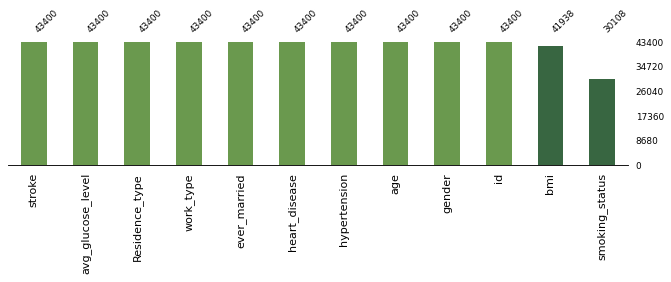

In [5]:
A= '#6a994e'

color = [A, A, A, A, A, A, A, A, A, A,'#386641','#386641']
fig, ax = plt.subplots(figsize=(10, 2), dpi=80)
fig.patch.set_facecolor('#ffffff')
ax.set_facecolor('#ffffff')
msno.bar(df, sort='descending', color=color, ax=ax, fontsize=8, labels='off', filter='top')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='center', size=10, weight='normal',  alpha=1)
ax.set_yticklabels('')
ax.spines['bottom'].set_visible(True)
plt.show()

#Categorical Features

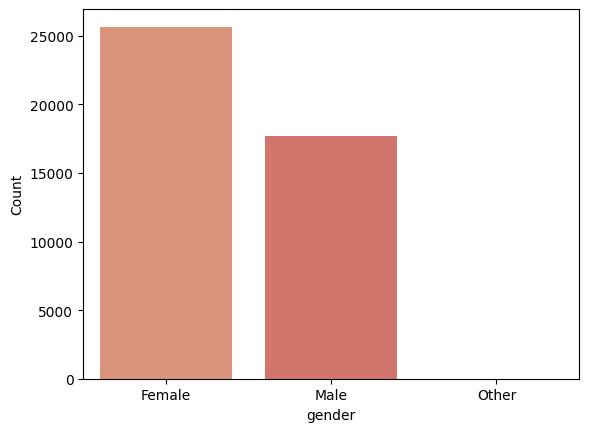

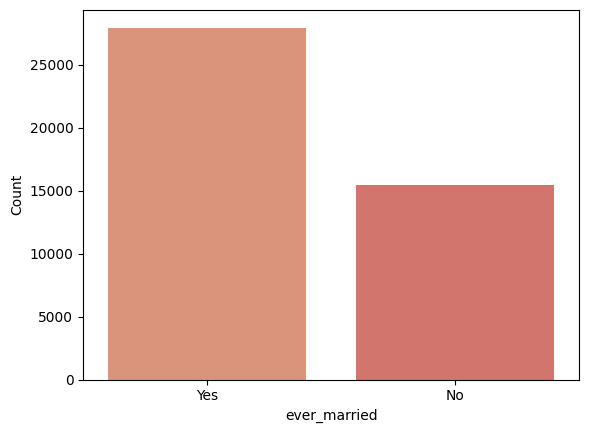

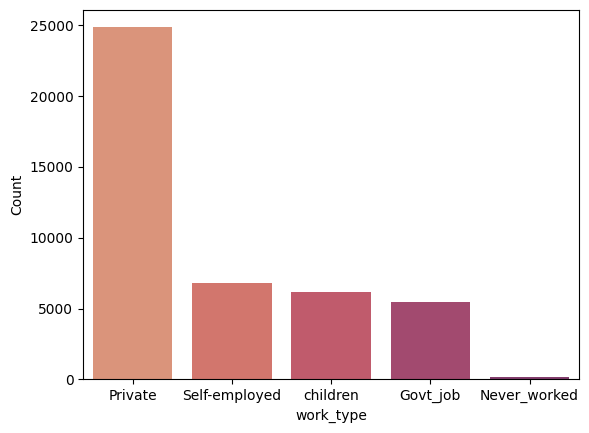

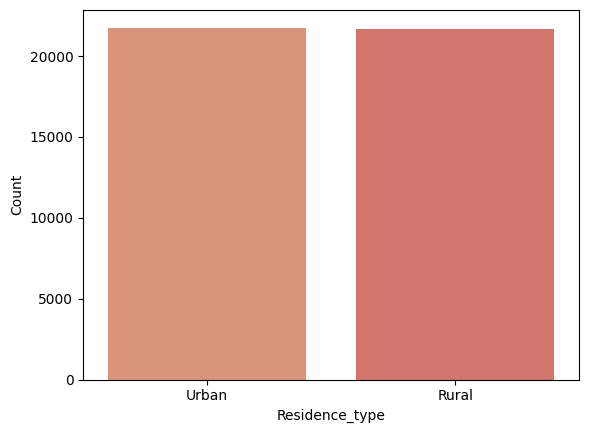

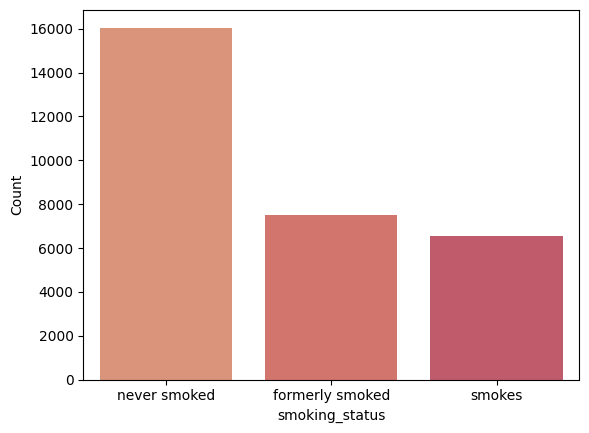

In [6]:
category_cols = df.select_dtypes(include=['object'])
sns.set_palette('flare')
for col in category_cols:
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

In [7]:
df["work_type"].value_counts()

Private          24834
Self-employed     6793
children          6156
Govt_job          5440
Never_worked       177
Name: work_type, dtype: int64

In [8]:
df["gender"].value_counts()

Female    25665
Male      17724
Other        11
Name: gender, dtype: int64

In [9]:
df["gender"]=df["gender"].map({"Male":2,"Female":1,"Other":0})

In [11]:
df["gender"].mean()

1.4081336405529954

In [12]:
df.count()

id                   43400
gender               43400
age                  43400
hypertension         43400
heart_disease        43400
ever_married         43400
work_type            43400
Residence_type       43400
avg_glucose_level    43400
bmi                  41938
smoking_status       30108
stroke               43400
dtype: int64

In [13]:
df["ever_married"]=df["ever_married"].map({"Yes":1,"No":0})

In [14]:
df["bmi"]=df["bmi"].fillna(df["bmi"].mean())
df = pd.get_dummies(df,columns=["work_type"])
df["Residence_type"]=df["Residence_type"].map({"Urban":1,"Rural":0})
df = pd.get_dummies(df,columns=["smoking_status"])
df.count()

id                                43400
gender                            43400
age                               43400
hypertension                      43400
heart_disease                     43400
ever_married                      43400
Residence_type                    43400
avg_glucose_level                 43400
bmi                               43400
stroke                            43400
work_type_Govt_job                43400
work_type_Never_worked            43400
work_type_Private                 43400
work_type_Self-employed           43400
work_type_children                43400
smoking_status_formerly smoked    43400
smoking_status_never smoked       43400
smoking_status_smokes             43400
dtype: int64

In [15]:
#Dropping ID column as it does not affect a person having  stroke or not
df=df.drop(["id"],axis=1)

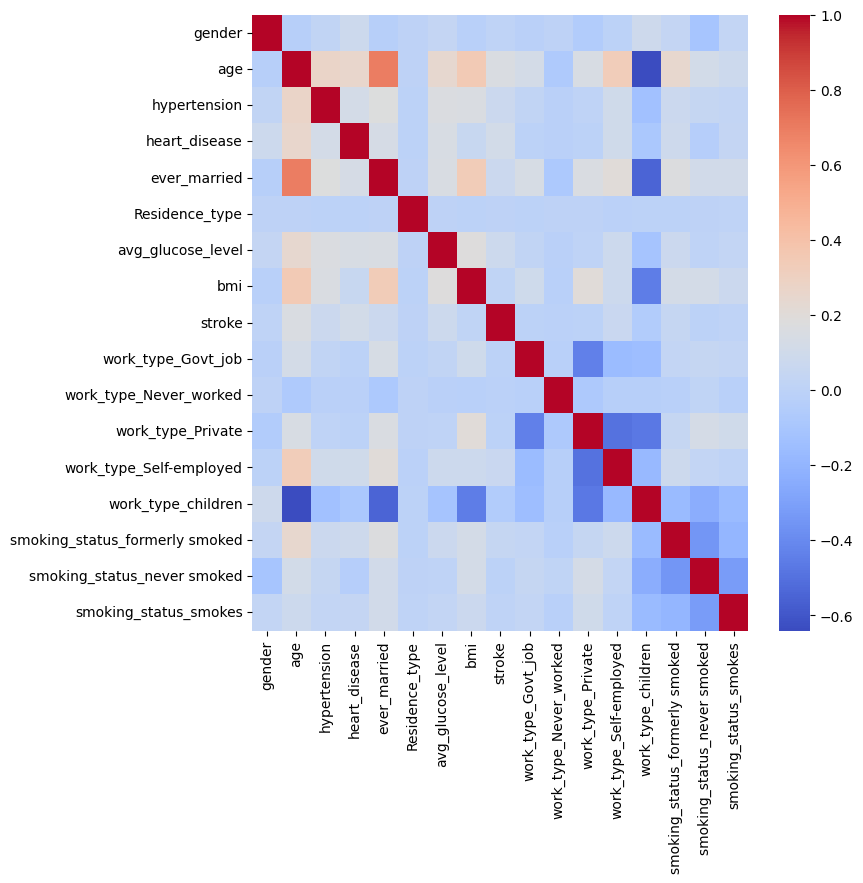

In [16]:
import seaborn as sns
correlation=df.corr()
fig, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(correlation,cmap='coolwarm')
plt.show()

#Splitting the Features and Target & Cross validation

In [17]:
y=df["stroke"]
X=df.drop(["stroke"],axis=1)


model1=LogisticRegression(solver="liblinear")
cross_val_score(model1,X,y,cv=10).mean()

0.9819585253456221

In [18]:
model2=DecisionTreeClassifier()
cross_val_score(model2,X,y,cv=10).mean()

0.9614746543778802

In [19]:
model3=RandomForestClassifier()
cross_val_score(model3,X,y,cv=10).mean()

0.9817050691244239

In [20]:
model4=KNeighborsClassifier()
cross_val_score(model4,X,y,cv=10).mean()

0.9815898617511521

In [21]:
#Choosing the best model among this 4 model
model5 = VotingClassifier(estimators = [("logistic regression",model1),("decision tree",model2),("random forest",model3),("knn",model4),],voting="soft")
cross_val_score(model5,X,y,cv=10).mean()

0.9819354838709676

#Split

In [23]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

#SMOTE for Imbalanced Classification

In [24]:
smote=SMOTE()
X_train,y_train=smote.fit_resample(X_train,y_train)

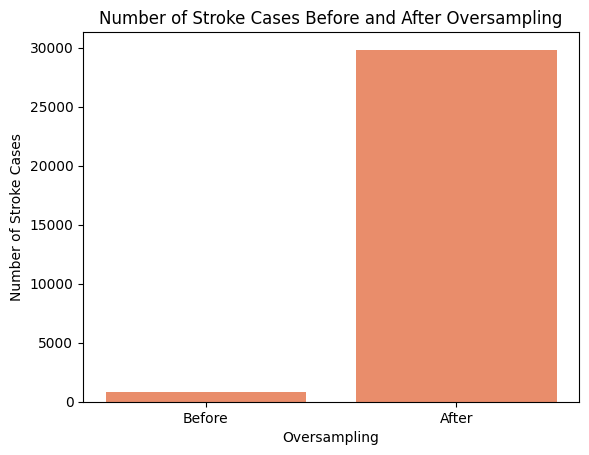

In [25]:
num_stroke_before = y.sum()
num_stroke_after = y_train.sum()

plt.bar(['Before', 'After'], [num_stroke_before, num_stroke_after])
plt.title('Number of Stroke Cases Before and After Oversampling')
plt.xlabel('Oversampling')
plt.ylabel('Number of Stroke Cases')
plt.show()

#Logistic regression

In [26]:
model_1=LogisticRegression(solver='liblinear')
model_1.fit(X_train,y_train)
y_hat=model_1.predict(X_test)

In [27]:
v = accuracy_score(y_test,y_hat)
print('Logistic Regression :',v*100,"%")

Logistic Regression : 89.68509984639017 %


In [28]:
print(classification_report(y_test,y_hat))

              precision    recall  f1-score   support

           0       0.99      0.91      0.95     12791
           1       0.05      0.28      0.09       229

    accuracy                           0.90     13020
   macro avg       0.52      0.59      0.52     13020
weighted avg       0.97      0.90      0.93     13020



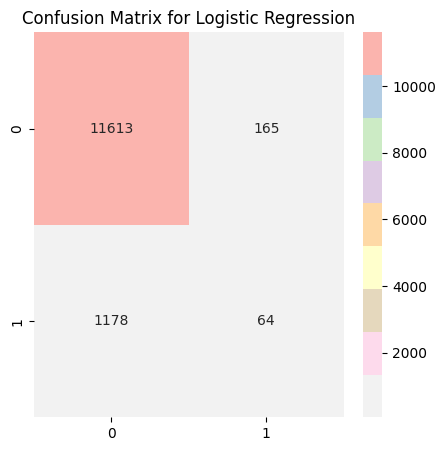

In [29]:
mat=confusion_matrix(y_hat, y_test)
from seaborn import heatmap
plt.figure(figsize=(5, 5))
sns.heatmap(mat, annot=True, fmt='d', cmap="Pastel1_r")
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

#Decision Tree

In [30]:
model_2= DecisionTreeClassifier()
model_2.fit(X_train,y_train)
y_hat=model_2.predict(X_test)

In [31]:
d = accuracy_score(y_test,y_hat)

print('Decision Tree :',d*100,"%")

Decision Tree : 94.98463901689708 %


In [32]:
print(classification_report(y_test,y_hat))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97     12791
           1       0.05      0.11      0.07       229

    accuracy                           0.95     13020
   macro avg       0.52      0.54      0.52     13020
weighted avg       0.97      0.95      0.96     13020



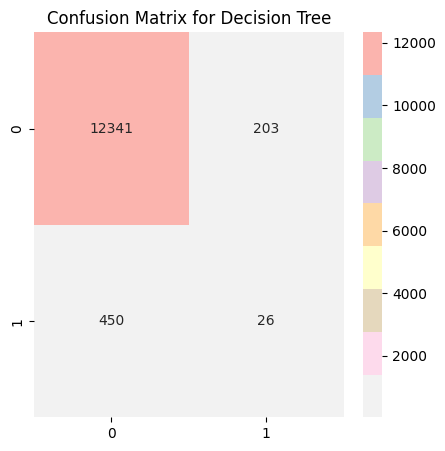

In [33]:
mat=confusion_matrix(y_hat, y_test)
from seaborn import heatmap
plt.figure(figsize=(5, 5))
sns.heatmap(mat, annot=True, fmt='d', cmap="Pastel1_r")
plt.title('Confusion Matrix for Decision Tree')
plt.show()

#KnnClassifier

In [34]:
model_3= KNeighborsClassifier(n_neighbors = 5)
model_3.fit(X_train,y_train)
y_hat=model_3.predict(X_test)

In [35]:
k = accuracy_score(y_test,y_hat)

print('KNN :',k*100,"%")

KNN : 84.715821812596 %


In [36]:
print(classification_report(y_test,y_hat))

              precision    recall  f1-score   support

           0       0.99      0.86      0.92     12791
           1       0.05      0.39      0.08       229

    accuracy                           0.85     13020
   macro avg       0.52      0.62      0.50     13020
weighted avg       0.97      0.85      0.90     13020



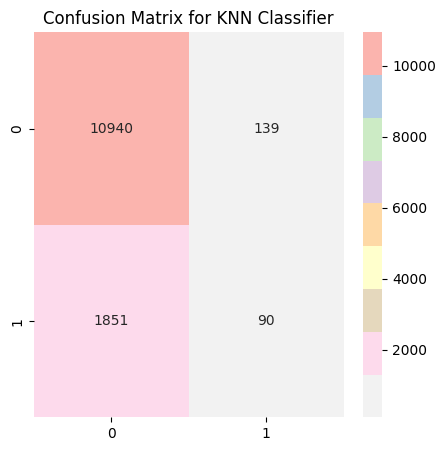

In [37]:
mat=confusion_matrix(y_hat, y_test)
from seaborn import heatmap
plt.figure(figsize=(5, 5))
sns.heatmap(mat, annot=True, fmt='d', cmap="Pastel1_r")
plt.title('Confusion Matrix for KNN Classifier')
plt.show()

#RandomForestClassifier

In [38]:
model_4= RandomForestClassifier()
model_4.fit(X_train,y_train)
y_hat=model_4.predict(X_test)

In [39]:
r = accuracy_score(y_test,y_hat)

print('RandomForestClassifier:',r*100,"%")

RandomForestClassifier: 96.79723502304147 %


In [40]:
print(classification_report(y_test,y_hat))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98     12791
           1       0.07      0.07      0.07       229

    accuracy                           0.97     13020
   macro avg       0.53      0.52      0.53     13020
weighted avg       0.97      0.97      0.97     13020



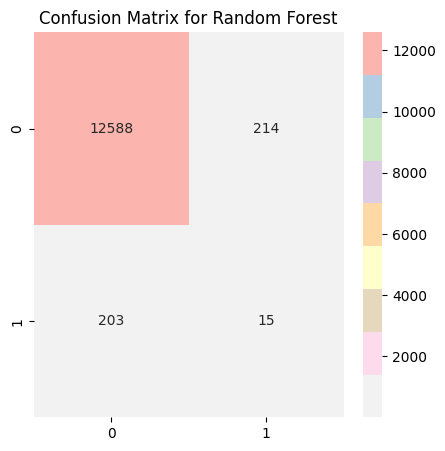

In [41]:
mat=confusion_matrix(y_hat, y_test)
from seaborn import heatmap
plt.figure(figsize=(5, 5))
sns.heatmap(mat, annot=True, fmt='d', cmap="Pastel1_r")
plt.title('Confusion Matrix for Random Forest')
plt.show()

In [43]:
models = {
    "Logistic Regression": 89.68509984639017,
    "Decision Tree": 94.98463901689708,
    "K-Nearest Neighbors": 84.715821812596,
    "Random Forest": 96.79723502304147,
}

name = list(models.keys())
accu = list(models.values())
error = []
for i in list(models.values()):
  error.append(100-i)

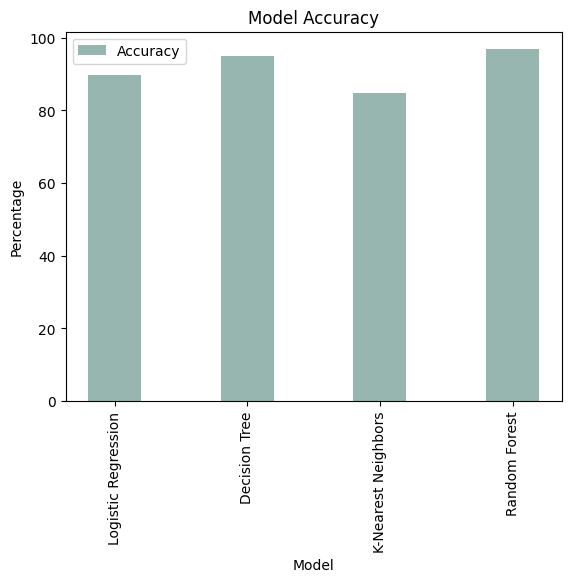

In [44]:
plt.bar(name, accu, label='Accuracy', color='#96b6af', width = 0.4)
plt.xlabel('Model')
plt.ylabel('Percentage')
plt.title('Model Accuracy')
plt.xticks(rotation=90)
plt.legend()
plt.show()

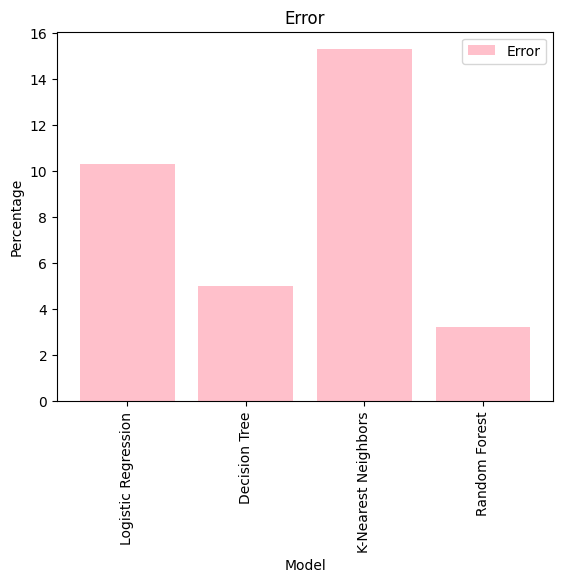

In [45]:
plt.bar(name, error , label='Error', color='pink')
plt.xlabel('Model')
plt.ylabel('Percentage')
plt.title('Error')
plt.xticks(rotation=90)
plt.legend()
plt.show()